# Fakultät für Physik

## Physikalisches Praktikum P1 für Studierende der Physik

Praktikumsvorversuch





# Datenverarbeitung am Beispiel des Pendels

Name: Achtner Vorname: Martin E-Mail: ms.achtner@googlemail.com

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: __________________ Vorname: __________________ E-Mail: __________________

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: 1

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: __________________

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 30.10.2003

---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

## Aufgabe 1: Umgang mit großen Datensätzen

**Hinweise zu allen hier durchzuführenden Messungen finden Sie in der Datei [Hinweise-Aufgabe-1.md](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/tree/main/Vorversuch/doc/Hinweise-Aufgabe-1.md).**

 * Öffnen Sie die Dateien ```data_raw.csv``` und ```data_down_sampled.csv``` per Doppelklick und untersuchen die Spalten und Zeilen. 
 * Geben Sie die Größe der Dateien in MB an. 
 * Stellen Sie die einzelnen Spalten jeweils in einem Diagramm, als Funktion der Zeit $t$ dar.
 
 Verwenden Sie für alle weiteren Untersuchung die Datei ```data_down_sampled.csv```. 

---

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import kafe2
import PhyPraKit as ppk
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
mpl.rcParams['figure.dpi']=200

### Aufgabe 1
Zur Bestimmung der Größe der Datei wird die Funktion $path.getsize$ im $os$ Modul verwendet.
Bei den Rohdaten werden nur die ersten 12000 Datenpunkte geplottet, um eine gewisse Übersich zu behalten.

Größe von 'data_raw.csv' in MB: 2.31
Größe von 'data_down_sampled.csv' in MB: 0.01


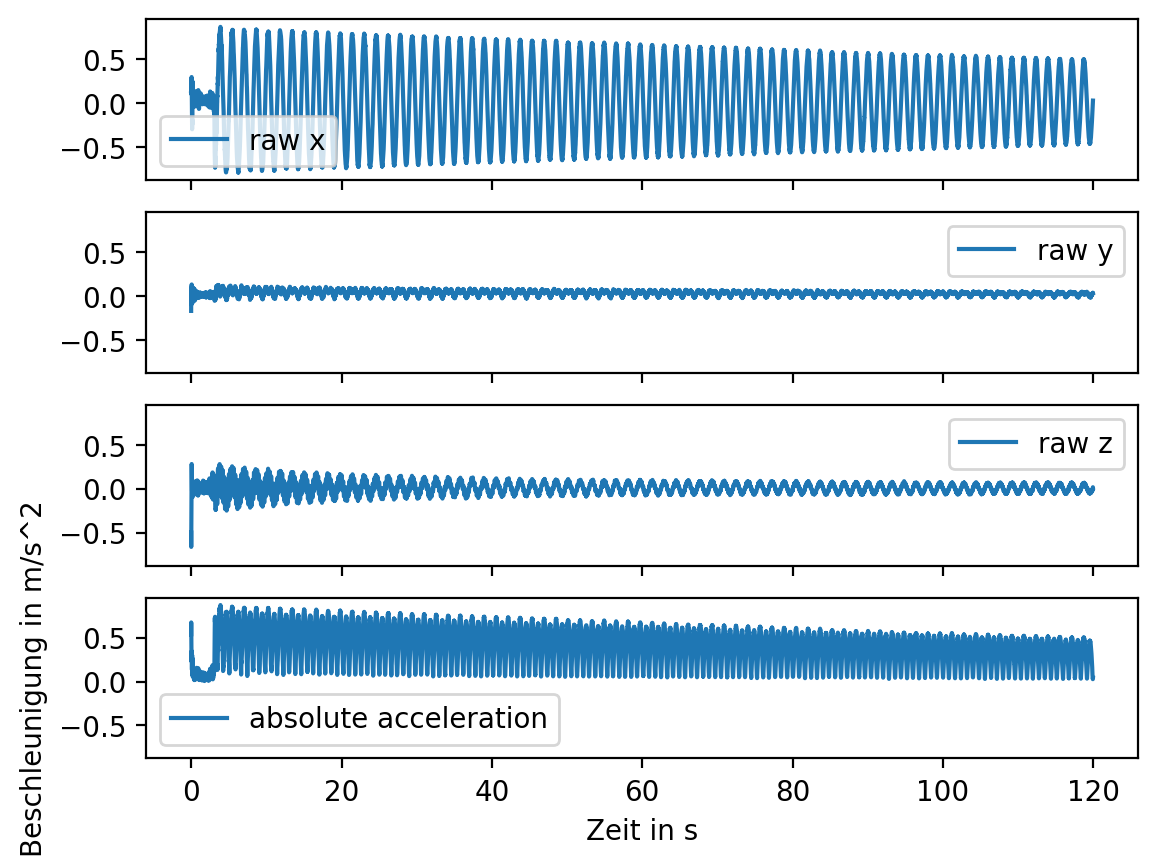

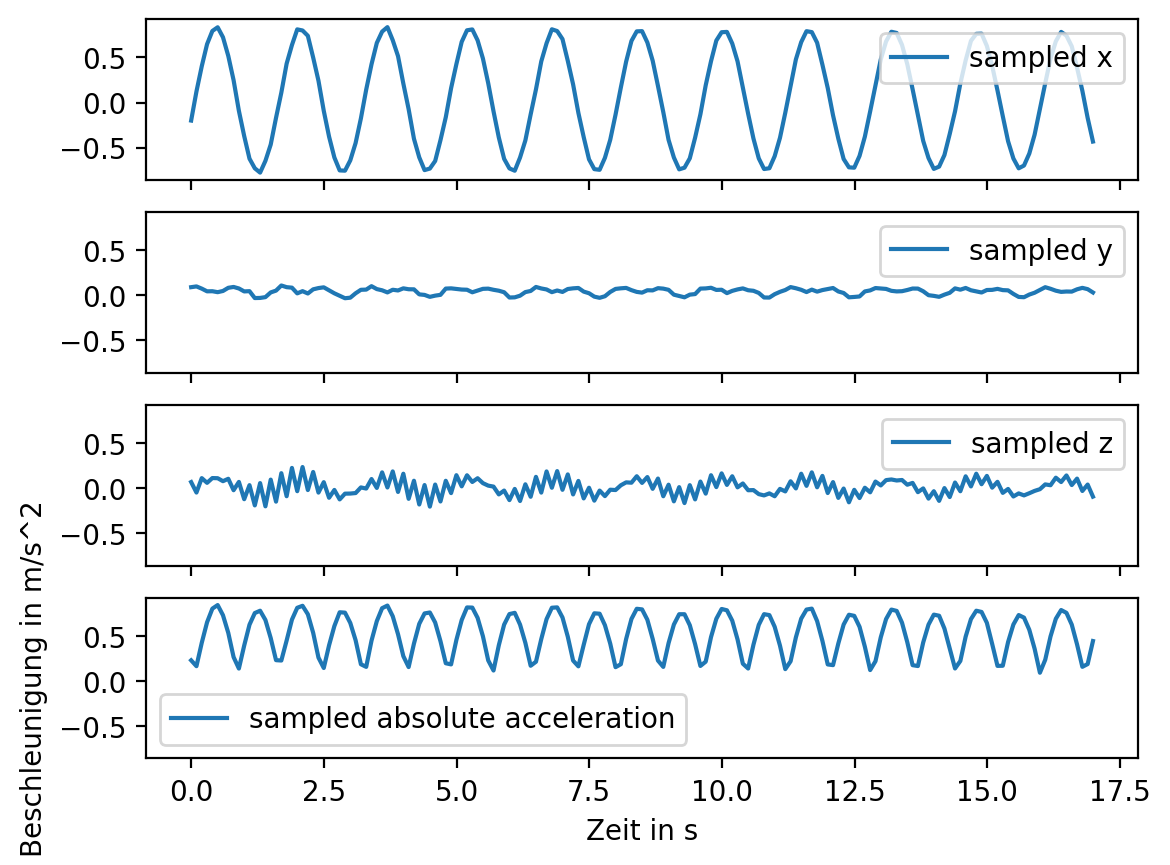

In [3]:
raw_data = np.genfromtxt( "data_raw.csv", 
                      delimiter=",", 
                      skip_header=1 ) # Einlesen der Daten, speichern in Variablen
time_raw = raw_data[:,0]
x_raw = raw_data[:,1]
y_raw = raw_data[:,2]
z_raw = raw_data[:,3]
acc_raw = raw_data[:,4]

sampled_data = np.genfromtxt("data_down_sampled.csv", delimiter=",", skip_header=1)

time_sam = sampled_data[:,0]
x_sam = sampled_data[:,1]
y_sam = sampled_data[:,2]
z_sam = sampled_data[:,3]
acc_sam = sampled_data[:,4]

print("Größe von 'data_raw.csv' in MB: " + str(round(os.path.getsize("./data_raw.csv")/1024**2, 2))) # berechne die Größe der Dateien
print("Größe von 'data_down_sampled.csv' in MB: " + str(round(os.path.getsize("./data_down_sampled.csv")/1024**2, 2)))

upper_lim = 12000 #len(time_raw - 1)
f, (ax1, ax2, ax3, ag) = plt.subplots(4, 1, sharex = True, sharey = True)

ax1.plot((time_raw[:upper_lim])-time_raw[0], x_raw[:upper_lim], label = "raw x")
ax1.legend()
ax2.plot((time_raw[:upper_lim])-time_raw[0], y_raw[:upper_lim], label = "raw y")
ax2.legend()
ax3.plot((time_raw[:upper_lim])-time_raw[0], z_raw[:upper_lim], label = "raw z")
ax3.legend()
ag.plot((time_raw[:upper_lim])-time_raw[0], acc_raw[:upper_lim], label = "absolute acceleration")
ag.legend()
plt.xlabel("Zeit in s")
plt.ylabel("Beschleunigung in m/s^2")
plt.show()

f, (ax1, ax2, ax3, ag) = plt.subplots(4, 1, sharex = True, sharey = True)
ax1.plot(time_sam-time_sam[0], x_sam, label = "sampled x")
ax1.legend(loc="upper right")
ax2.plot(time_sam-time_sam[0], y_sam, label = "sampled y")
ax2.legend()
ax3.plot(time_sam-time_sam[0], z_sam, label = "sampled z")
ax3.legend()
ag.plot(time_sam-time_sam[0], acc_sam, label = "sampled absolute acceleration")
ag.legend()


plt.xlabel("Zeit in s")
plt.ylabel("Beschleunigung in m/s^2")
time = time_sam - time_sam[0]
x = x_sam
y = y_sam
z = z_sam

Es ist zu erkennen, dass in x-Richtung eine periodische Schwingung stattfindet, welche mit der Zeit abklingt. In der y- und z- Richtung ist die Amplitude der Beschleunigung sehr viel kleiner und nicht so periodisch, im Vergleich zur x-Richtung. Für die folgende Analyse werden die Daten aus der x-Richtung verwendet.

## Aufgabe 2: Mathematische Pendel

**Hinweise zu allen hier durchzuführenden Messungen finden Sie in der Datei [Hinweise-Aufgabe-2.md](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/tree/main/Vorversuch/doc/Hinweise-Aufgabe-2.md).**

Zur Bestimmung von $g$ unterlegen wir zunächst das Modell eines [mathematischen Pendels](https://de.wikipedia.org/wiki/Mathematisches_Pendel), woraus sich $g$ wie folgt ableiten lässt:

$$
\begin{equation*}
g = \frac{4\,\pi^{2}}{T^{2}}\ell,
\end{equation*}
$$

wobei $\ell$ der Länge des Pendels entspricht. Als Referenzwert für alle weiteren Messungen können Sie den Wert 

$$
\begin{equation*}
g_{\mathrm{exp}} = (9.809599\pm0.000034)\,\mathrm{m/s^{2}}
\end{equation*}
$$

verwenden. Dieser Wert wurde aus der [Global Gravtiy Database des Bureau Gravimetrique International (BGI)](https://ggos.org/item/bgi/) für die Stadt Mannheim (bei $49,49^{\circ}$ nördlicher Breite und $8,53^{\circ}$ westlicher Länge auf einer Referenzhöhe von $101\,\mathrm{m}$) ausgelesen. 

### Aufgabe 2.1: Referenzmessung von $T$ 

 * Bestimmen Sie **einen einzelnen Wert** für die Periode $T$ in den Daten. 
 * Überlegen Sie sich eine sinnvolle Unsicherheit $\Delta T$ und ermitteln Sie $g$ mit entsprechender Unsicherheit $\Delta g^{(2.1)}$. Bestimmen Sie $\Delta g^{(2.1)}$ mit Hilfe linearer [Fehlerfortpflanzung](https://de.wikipedia.org/wiki/Fehlerfortpflanzung) nach Gauß. Berücksichtigen Sie dabei auch die Unsicherheit $\Delta\ell$.
 * Vergleichen Sie Ihr Ergebnis, im Rahmen der Unsicherheiten, mit $g_{\mathrm{exp}}$.

### Aufgabe 2.2: Erste Verbesserung der Methodik 

 * Bestimmen Sie $T$ aus einer Anpassung an alle Datenpunkte, bestehend aus den Wertepaaren $\left(t,\varphi(t)\right)$. Berücksichtigen Sie dabei die Unsicherheiten sowohl auf $t$, als auch auf $\varphi(t)$. Angaben zu diesen Unsicherheiten können Sie z.B. der Datei [Datenblatt.md](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/blob/main/Vorversuch/Datenblatt.md) entnehmen. Stellen Sie die Daten und das angepasste Modell geeignet graphisch dar. 
 * Notieren Sie die folgenden wichtigen Ausgaben der Anpassung: 
    * Qualität der Anpassung (quantifiziert durch die Größe $\hat{\chi}^{2}/n_{\mathrm{dof}}$) 
    * Die ermittelten Werte mit entsprechenden Unsicherheiten für alle an die Daten angepassten Parameter. 
 * Berechnen Sie aus den bestimmten Werten für $T$ und $\Delta T$ verbesserte Abschätzungen für $g^{(2.2)}$ und $\Delta g^{(2.2)}$. Bestimmen Sie $\Delta g^{(2.2)}$ mit Hilfe linearer [Fehlerfortpflanzung](https://de.wikipedia.org/wiki/Fehlerfortpflanzung) nach Gauß. Berücksichtigen Sie dabei auch die Unsicherheit $\Delta\ell$.
 * Vergleichen Sie Ihr Ergebnis, im Rahmen der Unsicherheiten, mit $g_{\mathrm{exp}}$. 
 
### Aufgabe 2.3: Zweite Verbesserung der Methodik

 * Bestimmen Sie $g^{(2.3)}$ und $\Delta g^{2.3}$ direkt aus der Anpassung. Formulieren Sie ihre Modellfunktion dazu entsprechend um, führen Sie die Anpassung erneut durch und vergleichen Sie die Ergebnisse für $g^{(2.3)}$ und $\Delta g^{(2.3)}$ mit den Ergebnissen aus Aufgabe 2.2. 
 * Überlegen Sie, wie Sie in diesem Fall $\Delta\ell$ im Ergebnis von $\Delta g^{(2.3)}$ berücksichtigen können.

---

### Aufgabe 2.1
Die  Unsicherheit auf $\Delta T$ lässt sich mit dem Fehlerfortpflanzungsgesetz durch 

$$ T = t_{max 2} - t_{max 1} $$

$$\Rightarrow \Delta T = \sqrt 2  \Delta t $$

beschreiben. $\Delta t = 0.0125 s$ ist die gegebene Unsicherheit der Messung in x-Richtung. Um einen Wert für die Periode zu finden, wird die Funktion $signal.find\_peaks$ aus dem $scipy$ Modul verwendet. Die Periodendauer ergibt sich dann aus der Differenz von zwei benachbarten Peaks. Hier wurde der erste und der zweite Peak verwendet ($t_{max 1}$ bzw. $t_{max 2}$). 


Die Unsicherheit auf g lässt sich mit dem Fehlerfortpflanzungsgesetz zu

$$ \Delta g = \sqrt{\Bigl(\frac{4 \pi^2}{T^2} \Delta l \Bigr)^2 + \Bigl(\frac{ - 8 \pi^2 l}{T^3} \Delta T \Bigr)^2} $$

berechnen. 

Gemessene Erdbeschleunigung: 11.0 +- 0.26
Das Ergebnis ist im Rahmen der Unsicherheit nicht gut.


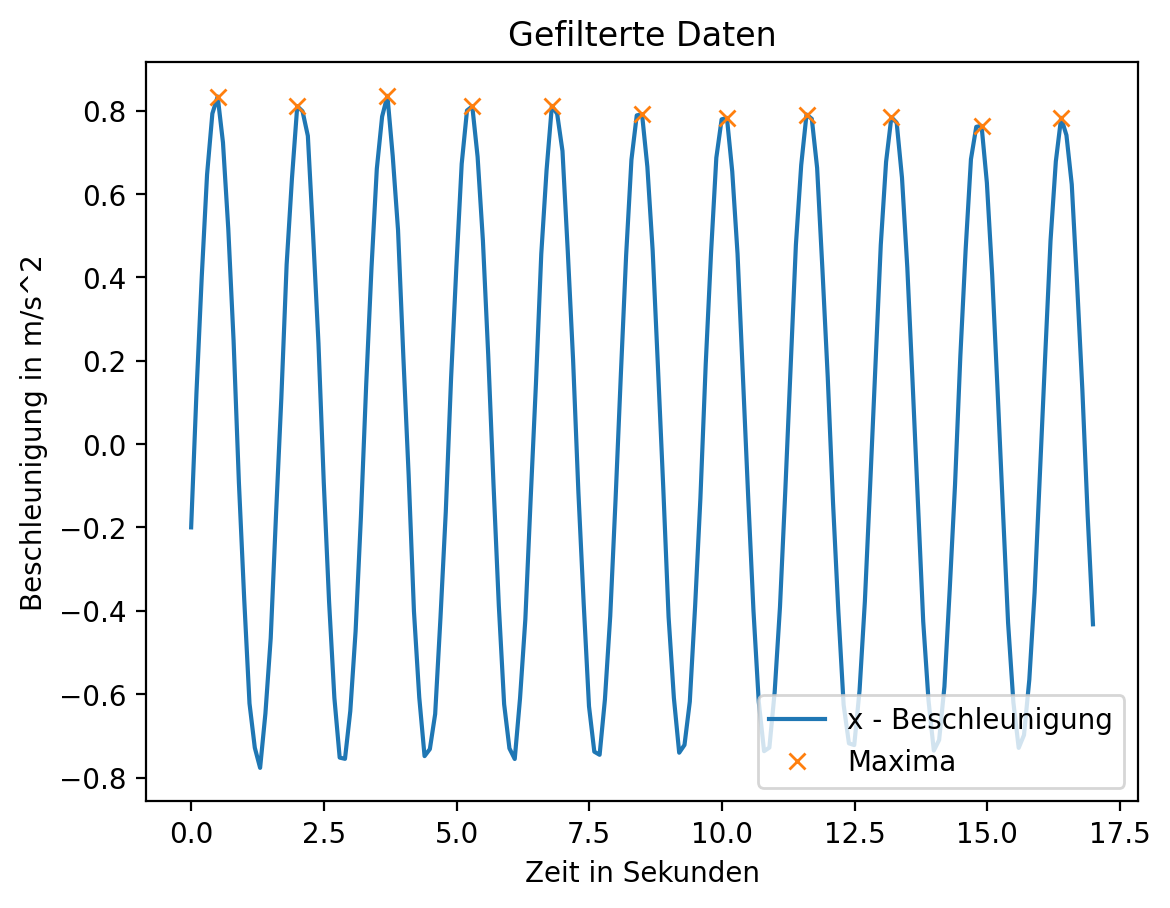

In [4]:
#Aufgabe 2.1
import scipy # für peak finder
wi = 3
pos_peaks, _ = scipy.signal.find_peaks(x_sam, width = wi) # suche nach beschleunigungspeaks in x - Richtung
plt.plot(time, x, label = "x - Beschleunigung")
plt.plot(time[pos_peaks], x[pos_peaks], "x", label = "Maxima")
plt.legend(loc = "lower right")
plt.xlabel("Zeit in Sekunden")
plt.ylabel("Beschleunigung in m/s^2")
plt.title("Gefilterte Daten")
T = (time[pos_peaks[1]] - time[pos_peaks[0]] )
l = 0.6285
# abgeschätzte/abgelesene (absolute) Unsicherheit: 
t_error = 0.0125                                # Uncertainty in time (s)
x_error = 0.02                                  # Uncertainty in x Axis acceleration (m/s**2)

d_T = np.sqrt(2) * t_error
d_l = 0.0005

g = 4 * np.pi**2 * l / (T**2)
g_exp = 9.8096

#Fehler:

d_g = np.sqrt((4 * np.pi**2 / (T**2) * d_l)**2 + (-8 * np.pi**2 * l / (T**3) * d_T)**2) # Fehler auf g nach obiger Formel

print("Gemessene Erdbeschleunigung: " + str(round(g, 0)) + " +- " + str(round(d_g, 2)))
print("Das Ergebnis ist im Rahmen der Unsicherheit " + "nicht " * (g_exp < g - d_g or g_exp > g + d_g) + "gut.")

### Aufgabe 2.2 
Um den Fit durchführen zu können wird ein Modell benötigt. Dieses ist zuerst eine einfache Sinus Funktion.
Als Modell wird eine Sinusfunktion der Form $\ddot{\Phi}(t) = A sin(\omega t - b) $ mit $ \omega = \frac{2 \pi}{T} $verewendet. Für den Fit werden folgende Anfangswerte verwendet: 
$$ A = 0.8 \frac{rad}{s^2} \quad \Delta A = 0.05 \frac{rad}{s^2}$$
$$ b = 0.25 \quad \Delta b = 0.05$$
$$ T = 1.6 s \quad \Delta T = 0.26 s$$
(A und b durch abschätzen, T durch Aufgabenteil 2.1).
Der Fit wird mit der kafe2 Bibliothek durchgeführt.
Zur Auswertung wird zusärtzlich zu $\frac{\chi^2}{ndf}$ die Größe $Pull = \frac{|g_{exp} - g_{fit}|}{\sqrt{\Delta g_{exp}^2 + \Delta g_{fit}^2}}$ verwendet. Desto kleiner sie ist, desto besser ist der Messwert im Rahmen der Unsicherheit.

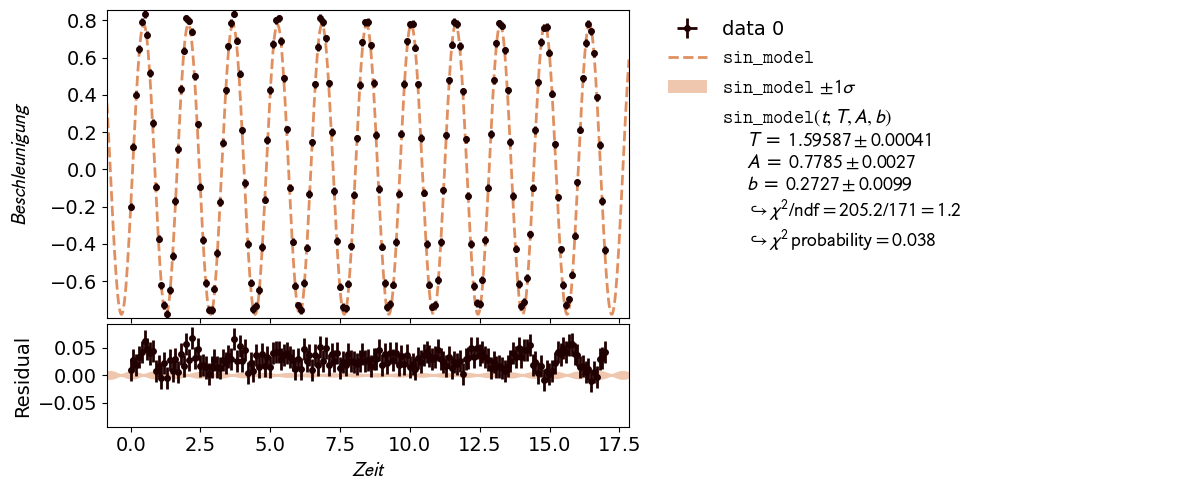

Qualität des Fits über Xi-Quadrat Methode berechnet: 1.2
Periode: T = 1.59587 +- 0.00041 s
Amplitude: A = 0.7785 +- 0.0027 rad/s²
Verschiebung: b = 0.273 +- 0.01
Der Pull Beträgt: 7.26
Gemessene Erdbeschleunigung, über den Fit optimiert: 9.74 +- 0.009 m/s²
Das Ergebnis ist im Rahmen der Unsicherheit nicht gut.


In [5]:
#Aufgabe 2.2

def sin_model(t, T, A, b):
    w = np.pi * 2 / T
    return A * np.sin(w * t - b)

t_error = 0.0125                                # Uncertainty in time (s)
x_error = 0.02                                  # Uncertainty in x Axis acceleration (m/s**2)
fit = kafe2.XYFit(xy_data=[time, x], model_function=sin_model) 
fit.add_error(axis='y', err_val=x_error)
fit.add_error(axis='x', err_val=t_error)

fit.add_parameter_constraint(name='A',   value=0.8,   uncertainty=0.05)

fit.add_parameter_constraint(name='b',   value=0.25,   uncertainty=0.05)

fit.add_parameter_constraint(name='T',   value=1.6,   uncertainty=d_T)
fit.limit_parameter("T", lower=1.55, upper=1.65)


# Fit ausführen
fit.do_fit()
plot = kafe2.Plot(fit)
plot.y_label = "$Beschleunigung$"
plot.x_label = "$Zeit$"
plot.plot(residual=True)
plot.show()
print(fit)
par_vals=fit.parameter_values 
par_errs=fit.parameter_errors
chi = fit.goodness_of_fit / fit.ndf

print("Qualität des Fits über Xi-Quadrat Methode berechnet: " + str(round(chi, 2)))
print("Periode: T = " + str(round(par_vals[0], 5)) + " +- " + str(round(par_errs[0], 5)) + " s")
print("Amplitude: A = " + str(round(par_vals[1], 4)) + " +- " + str(round(par_errs[1], 4)) + " rad/s²")
print("Verschiebung: b = " + str(round(par_vals[2], 3)) + " +- " + str(round(par_errs[2], 3)))

T_fit = par_vals[0]
d_T_fit = par_errs[0]

g_fit = 4 * np.pi**2 * l / (T_fit**2)
g_exp = 9.8095099
d_g_exp = 0.000034

#Fehler:

d_g_fit = np.sqrt((4 * np.pi**2 / (T_fit**2) * d_l)**2 + (-8 * np.pi**2 * l / (T_fit**3) * d_T_fit)**2)
pull = np.abs(g_fit - g_exp) / np.sqrt(d_g_fit**2 + d_g_exp**2)
print("Der Pull Beträgt: " + str(round(pull, 2)))
print("Gemessene Erdbeschleunigung, über den Fit optimiert: " + str(round(g_fit, 2)) + " +- " + str(round(d_g_fit, 3))+" m/s²")
print("Das Ergebnis ist im Rahmen der Unsicherheit " + "nicht " * (g_exp < g_fit - d_g_fit or g_exp > g_fit + d_g_fit) + "gut.")


### Aufgabe 2.3
Die Qualität des Fits ist für die einfach Funktion, die verwendet wurde, akzeptabel. Bei der $\chi^2$ Methode gilt, dass der Fit besser wird, desto näher $\frac{\chi^2}{ndf}$ an 1 ist. Dass eine gewisse Periodizität im Residual zu erkennen ist lässt aber darauf schließen, dass es ein Modell gibt, welche die Daten aber noch besser beschreibt. Interessanterweise ist der Resiudal Graph fast übber all größer als null. Dies hängt wohl damit zusammen, dass die negativen Auslenkungen in den Daten eine kleinere Amplitude als die positiven Daten haben.

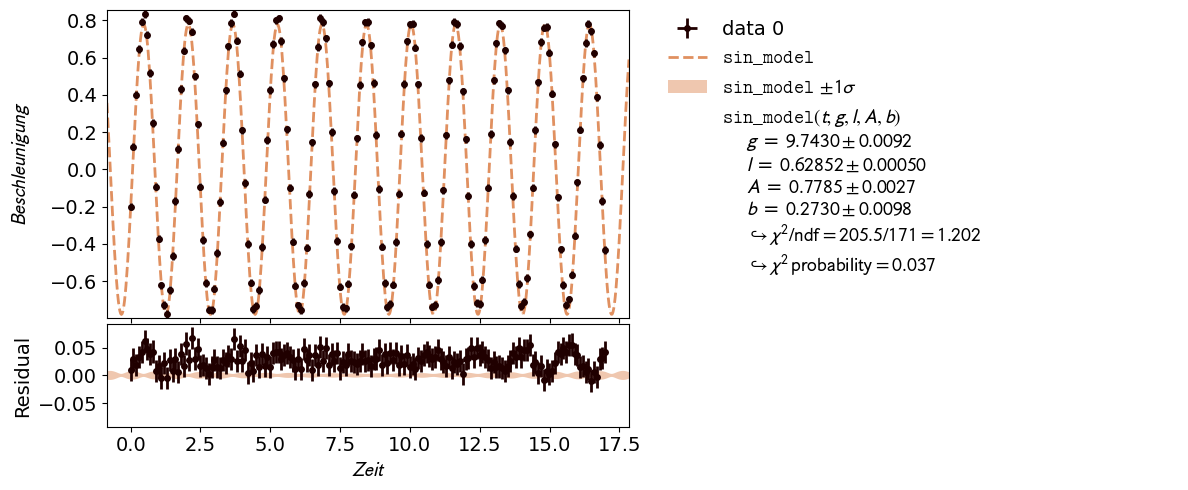

Der Pull Beträgt: 7.25
Die gemessene Erdbeschleunigung, über den Fit optimiert: 9.743 +- 0.0092 m/s²
Das Ergebnis ist im Rahmen der Unsicherheit nicht gut.


In [6]:
#Aufgabe 2.3

def sin_model(t, g, l, A, b):
    w = np.sqrt(g / l)
    return A * np.sin(w * t - b)

t_error = 0.0125                                # Uncertainty in time (s)
x_error = 0.02                                  # Uncertainty in x Axis acceleration (m/s**2)
fit = kafe2.XYFit(xy_data=[time, x], model_function=sin_model) 
fit.add_error(axis='y', err_val=x_error)
fit.add_error(axis='x', err_val=t_error)

fit.add_parameter_constraint(name='g',   value=9.8,   uncertainty=0.1)
fit.limit_parameter("g", lower=9.7, upper=9.9)

fit.add_parameter_constraint(name='l',   value=l,   uncertainty=d_l)

fit.add_parameter_constraint(name='A',   value=0.8,   uncertainty=0.05)

fit.add_parameter_constraint(name='b',   value=0.25,   uncertainty=0.05)
fit.limit_parameter("b", lower=0.2, upper=0.3)




# Fit ausführen
fit.do_fit()
plot = kafe2.Plot(fit)
plot.y_label = "$Beschleunigung$"
plot.x_label = "$Zeit$"
plot.plot(residual=True)
plot.show()
print(fit)
par_vals=fit.parameter_values 
par_errs=fit.parameter_errors
chi =fit.goodness_of_fit / fit.ndf

g_fit = par_vals[0]
d_g_fit = par_errs[0]

pull = np.abs(g_fit - g_exp) / np.sqrt(d_g_fit**2 + d_g_exp**2)
print("Der Pull Beträgt: " + str(round(pull, 2)))
print("Die gemessene Erdbeschleunigung, über den Fit optimiert: " + str(round(g_fit, 3)) + " +- " + str(round(d_g_fit, 4)) + " m/s²")
print("Das Ergebnis ist im Rahmen der Unsicherheit " + "nicht " * (g_exp < g_fit - d_g_fit or g_exp > g_fit + d_g_fit) + "gut.")



Die Unsicherheit von $l$ wurde dem Modell mit der Funktion "add_parameter_constraint" hinzugefügt. Normalerweise ist diese Funktion lediglich dafür da, Werte hinzuzufügen, die durch den Fit bestimmt werden sollen. $l$ ist nicht solch ein Wert, da dieser Wert gemessen wurde, er also in keiner Weise irgendwie optimiert werden muss. Da sich hier aber nicht sehr viel am Wert von $l$, oder $\Delta l$ ändert, liefert dies Richtige Ergebnisse. Alternativ wäre es ebenfalls möglich, einen festen Wert von $l$ anzugeben, und dann den endgültigen Fehler von $g$ durch das arithmetische Mittel zwischen $\Delta l$ und dem Fehler auf g, den der Fit liefert, zu berechnen.

## Aufgabe 3: Schrittweise Erweiterung des Modells

**Hinweise zu allen hier durchzuführenden Messungen finden Sie in der Datei [Hinweise-Aufgabe-3.md](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/tree/main/Vorversuch/doc/Hinweise-Aufgabe-3.md).**

Eine offensichtliche Unzulänglichkeit des vorherigen Modells besteht in der Vernachlässigung der endlichen Ausdehnung des Pendels. Wenn Sie das Modell entsprechend erweitern, nimmt die Formel zur Bestimmung von $g$ die folgende Form an: 

$$
\begin{equation*}
g = \frac{4\,\pi^{2}}{T^{2}}\frac{\Theta}{Ms},
\end{equation*}
$$

wobei $\Theta$ und $M$ dem Trägheitsmoment und der Masse der gesamten Pendelkonstruktion (einschließlich aller Montageteile und Smartphone!) und $s$ dem Abstand zwischen dem Schwerpunkt und der Aufhängung des Pendels entsprechen.

### Aufgabe 3.1: Erste Erweiterung des Modells 

 * Modifizieren Sie Ihr Modell, so dass es dem Modell eines [physikalischen Pendels](https://de.wikipedia.org/wiki/Physikalisches_Pendel) entspricht und machen Sie eine neue Abschätzung für $g^{(3.1)}$ und $\Delta g^{(3.1)}$. 
 * Schätzen Sie den Einfluss von $\Delta\Theta$, $\Delta M$, und $\Delta s$ auf $\Delta g^{(3.1)}$ ab und überlegen Sie, wie Sie diese Unsicherheiten geeignet zu einer Gesamtunsicherheit kombinieren können.

### Aufgabe 3.2: Zweite Erweiterung der Modells

Das Pendel erfährt in seiner Bewegung zusätzlich eine Dämpfung. Wenn Sie der Messung das Modell einer [linearer gedämpften Schwingung](https://de.wikipedia.org/wiki/Schwingung#Linear_ged%C3%A4mpfte_Schwingung) zugrunde legen verändert sich die Formel zur Bestimmung von $g$ wie folgt: 

$$
\begin{equation}
g = \left(\frac{4\,\pi^{2}}{T_{0}^{2}}+\frac{1}{\tau^{2}}\right)\frac{\Theta}{m\,\ell},
\end{equation}
$$

wobei $\tau$ einer Abklingzeit der Schwingungsamplitude in Sekunden entspricht. Wie Sie sehen handelt es sich um eine Korrektur, die die Abschätzung von $g$ zu größeren Werten hin verändert. 

Verändern Sie ihr Modell geeignet und beantworten Sie die folgenden Fragen: 
  * Kann das zugrundeliegende Modell die Daten beschreiben? 
  * Wie könnten Sie die Hypothese, dass das zugrundeliegende Modell die Daten beschreiben kann, noch besser testen? 
  * Wie groß ist der Effekt der Korrektur aus der obigen Gleichung auf die Messung von $g$? 

---

### Aufgabe 3.1
In dieser Aufgabe soll das Modell verbessert werden. Dazu wird die bisher vernachlässigte Auslenkung des Stabes, an dem das Handy schwingt berücksichtigt. Es wird also das Trägheitsmoment $\Theta$ des Stabes berücksichtigt. Das neue Modell ist $ \ddot{\Phi}(t) = A sin(\omega t - b) $ mit $ \omega = \sqrt{\frac{g M s}{\Theta}}$. In diesem Modell wird also auch das Trägheitsmoment des Stabes beachtet.

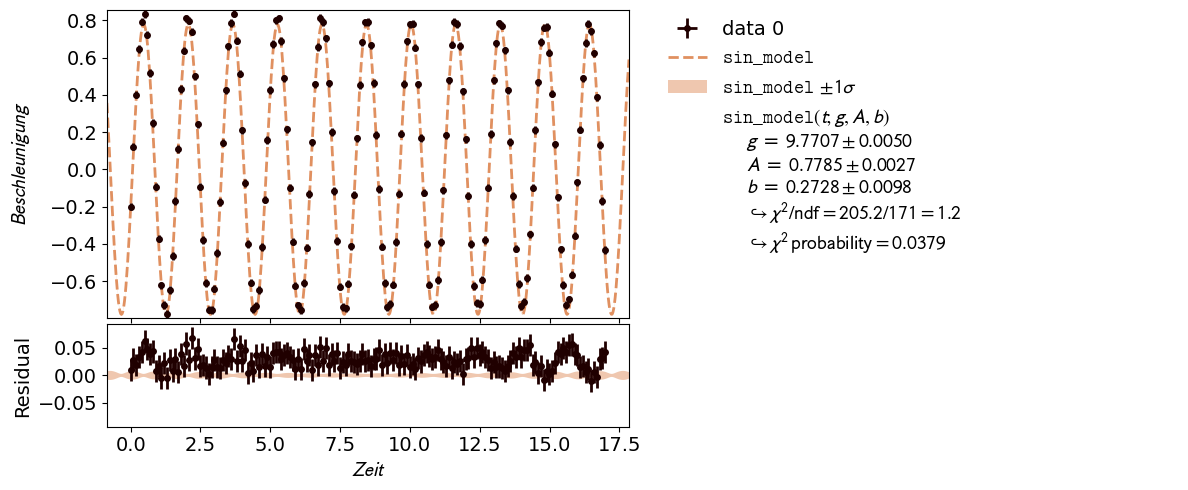

Der Pull Beträgt: 0.16
Gemessene Erdbeschleunigung, über den Fit optimiert, unter der Berücksichtigung des Trägheitsmoments: 9.77 +- 0.25m/s²


In [16]:
#Aufgabe 3.1
def sin_model(t, g, A, b):
    s=0.473
    theta=0.23523
    M=0.789
    w = np.sqrt(g * M * s/theta)
    return  A * np.sin(w * t - b)

t_error = 0.0125                                # Uncertainty in time (s)
x_error = 0.02                                  # Uncertainty in x Axis acceleration (m/s**2)
fit = kafe2.XYFit(xy_data=[time, x], model_function=sin_model) 
fit.add_error(axis='y', err_val=x_error)
fit.add_error(axis='x', err_val=t_error)

fit.add_parameter_constraint(name='g',   value=9.8,   uncertainty=0.1)
fit.limit_parameter("g", lower=9.7, upper=9.85)

fit.add_parameter_constraint(name='A',   value=0.8,   uncertainty=0.05)
fit.limit_parameter("A", lower=0.75, upper=0.85)

fit.add_parameter_constraint(name='b',   value=0.25,   uncertainty=0.05)
fit.limit_parameter("b", lower=0.2, upper=0.3)

# Fit ausführen
fit.do_fit()
plot = kafe2.Plot(fit)
plot.y_label = "$Beschleunigung$"
plot.x_label = "$Zeit$"
plot.plot(residual=True)
plot.show()
print(fit)
par_vals=fit.parameter_values 
par_errs=fit.parameter_errors
chi =fit.goodness_of_fit / fit.ndf

g_fit = par_vals[0]
d_g_fit = par_errs[0]
d_g_sys = 0.245

pull = np.abs(g_fit - g_exp) / np.sqrt((d_g_fit + d_g_sys)**2 + d_g_exp**2)
print("Der Pull Beträgt: " + str(round(pull, 2)))
print("Gemessene Erdbeschleunigung, über den Fit optimiert, unter der Berücksichtigung des Trägheitsmoments: " + str(round(g_fit, 2)) + " +- " + str(round(d_g_fit + d_g_sys, 3)) + "m/s²")



Es ist eine Verbesserng des Fits festzustellen. Der Pull in Aufgabe 2.2 beträgt 7.25, hier nur 0.16. Auch der $\frac{\chi ^2}{ndf} $ Test lässt auf eine leichte Verbesserung des Modells schlißen. Im Residual ist jedoch immer noch eine Periodizität zu erkennen, das Modell kann also immer noch verbessert werden.

Der Einfluss auf $\Delta g$ von $\Delta\Theta, \Delta s, \Delta M$ ist wie folgt:
$$\Delta\Theta \rightarrow \Delta g = 0.15 m/s²$$
$$\Delta s \rightarrow \Delta g = 0.15 m/s²$$
$$\Delta M\rightarrow \Delta g = 0.1235 m/s²$$
Diese Werte ergeben sich, indem die obere und untere Grenze aus dem Datenblatt jeweils in das Modell anstelle des tatsächlichen Werts eingegeben werden. $\Delta g$ ist dann die Differenz von g zwischen dem oberen eingegebenen Wert und dem Unteren.
Sie können mit dem arithmetischen Mittel geeignet komibniert werden: 
$$\Delta g_{sys} = \sqrt{\Delta\Theta^2 + \Delta s^2 + \Delta M^2} = 0.245 \frac{m}{s^2}$$
Daraus ergibt sich der systematische Fehler, da die Werte und Unsicherheiten keine Parameter des Fits sind. Dieser wurde bei der Berechnung des Pulls bereits berücksichtigt. Bei dem tatsächlichen Fehler auf g muss der systematische Fehler noch auf den Fehlder, den der Fit liefert, addiert werden

### Aufgabe 3.2
Nun soll neben dem Trägheitsmoment des Stabes auch die Reibung berücksichtigt werden. Diese wird im neunen Modell durch eine zeitabhängige Amplitude berücksichtig. konkret bedeutet dies, dass die Amplitude mit dem Faktor $ e^{-\frac{t}{\tau}}$ multipliziert wird. Hierbei ist $\tau$ eine größe für die Reibung. Desto kleiner $\tau$, desto schneller skinkt die Amplitude. Das neue Modell ist $ \ddot{\Phi}(t) = A e^{-\frac{t}{\tau}} sin(\omega t - b) $ mit $ \omega = \sqrt{\frac{gMs}{\Theta} - \frac{1}{\tau}^2}$

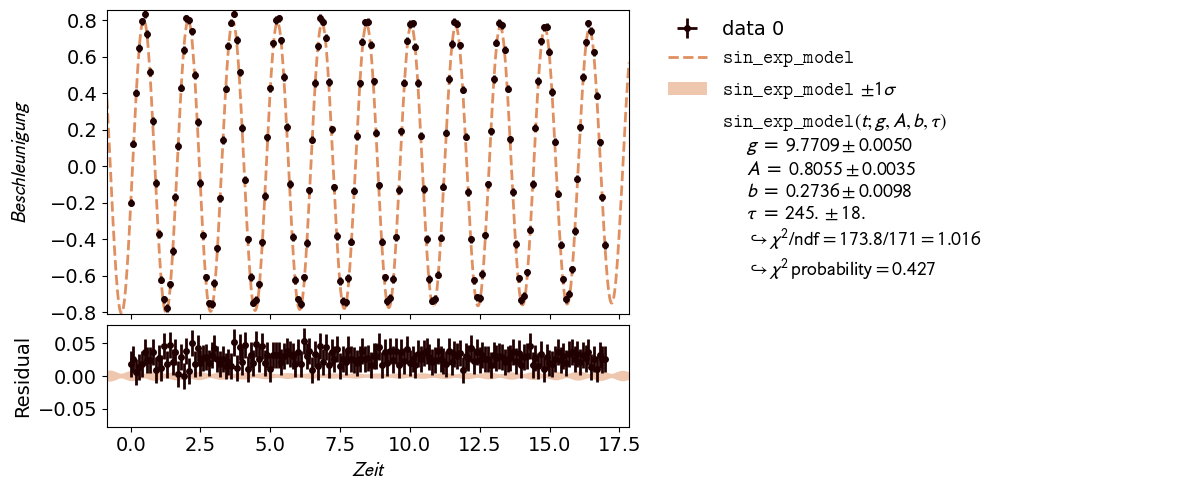

Der Pull Beträgt: 0.15
Gemessene Erdbeschleunigung, über den Fit optimiert: 9.771 +- 0.25m/s²


In [20]:
#Aufgabe 3.2

def sin_exp_model(t, g, A, b, tau):
    s=0.473
    theta=0.23523
    M=0.789
    w = np.sqrt(g * M * s / theta - 1 / tau**2)
    return A * np.exp(-t/tau) * np.sin(w * t - b)

t_error = 0.0125                                # Uncertainty in time (s)
x_error = 0.02                                  # Uncertainty in x Axis acceleration (m/s**2)
fit = kafe2.XYFit(xy_data=[time, x], model_function=sin_exp_model) # x-Werte hier die Massen
fit.add_error(axis='y', err_val=x_error)
fit.add_error(axis='x', err_val=t_error)

fit.add_parameter_constraint(name='g',   value=9.8,   uncertainty=0.1)
fit.limit_parameter("g", lower=9.75, upper=9.85)

fit.add_parameter_constraint(name='A',   value=0.8,   uncertainty=0.05)
fit.limit_parameter("A", lower=0.7, upper=0.9)

fit.add_parameter_constraint(name='b',   value=0.25,   uncertainty=0.05)
fit.limit_parameter("b", lower=0.2, upper=0.3)

fit.add_parameter_constraint(name='tau',   value=245,   uncertainty=20)
#fit.limit_parameter("tau", lower=240, upper=250)


# Fit ausführen
fit.do_fit()
plot = kafe2.Plot(fit)
plot.y_label = "$Beschleunigung$"
plot.x_label = "$Zeit$"
plot.plot(residual=True)
plot.show()
print(fit)
par_vals=fit.parameter_values 
par_errs=fit.parameter_errors
chi =fit.goodness_of_fit / fit.ndf

g_fit = par_vals[0]
d_g_fit = par_errs[0]

pull = np.abs(g_fit - g_exp) / np.sqrt((d_g_fit + d_g_sys)**2 + d_g_exp**2)
print("Der Pull Beträgt: " + str(round(pull, 2)))
print("Gemessene Erdbeschleunigung, über den Fit optimiert: " + str(round(g_fit, 3)) + " +- " + str(round(d_g_fit + d_g_sys, 4)) + "m/s²")

Das Modell kann die Daten gut beschreiben, da sowohl der Pull sich noch etwas verbessert hat, aber auch die $\frac{\chi^2}{ndf}$ Wahrscheinlichkeit mit $42.7%$ einen Wert annimmt, welche zur Annahme der Hypothese, dass dieses Modell die Daten beschreibt ausreichen würde. Auch die bisherige Periodizität im Resiudal ist verschwunden. 

Es ist nicht klar, wieso ndf in Versuch drei den Wert 171 hat.